In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
y=list()
#X=list(range(0,1,0.1)) range only generate integer numbers
# can use this np.linspace(0, 1, 5) or np.arange(0,1,0.1)
# gaussian error (np.random.normal(0,1))
X=np.linspace(0, 1, 100).reshape(-1,1)

for i in X:
    y.append(math.sin(2*(math.pi)*i)+np.random.normal(0,1))
y=np.array(y)

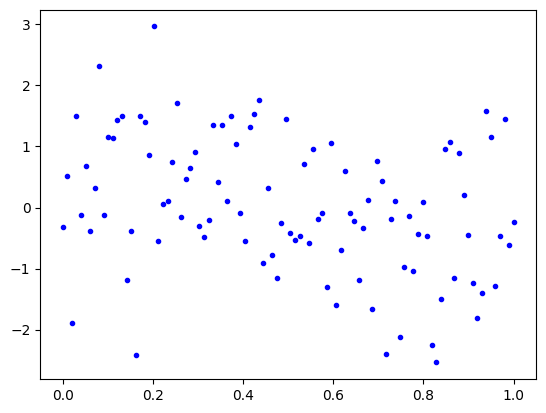

In [20]:
plt.plot(X,y,'b.')

In [21]:
def computeCost(X,y,w,b):
  cost=(1/len(X))*np.sum(((np.dot(X,w)+b)-y)**2)
  return cost

def compute_fx_function(X,w,b):
  return np.dot(X,w)+b

def compute_gradient1(X,y,w,b,t):
    m,n = X.shape
    temp=X
    for i in range(2,t+1):
      temp=np.append(temp,X**i,axis=1)
    X=temp
    fx= compute_fx_function(X,w,b)
    dj_dw= np.dot((fx-y),X)
    dj_db= np.sum((fx-y))
    dj_dw = dj_dw/m
    dj_db = dj_db/m                                  
        
    return dj_db, dj_dw 

def descent_gradient(X,y,iters,alpha,t):
    w=np.zeros(t)
    b=0
    for i in range(iters):
      #print(w,b)
      dj_db,dj_dw=compute_gradient1(X,y,w,b,t)
      w=w-dj_dw
      b=b-dj_db

    return w,b

In [22]:
def descGradPoly(X,y,iters,alpha,t):
  XX=X
  w,b=descent_gradient(X,y,iters,alpha,t)
  temp=X
  for i in range(2,t+1):
      temp=np.append(temp,X**i,axis=1)
  X=temp
  y_pred=compute_fx_function(X,w,b)
  plt.plot(XX,y_pred,'r-')

  return computeCost(X,y,w,b)

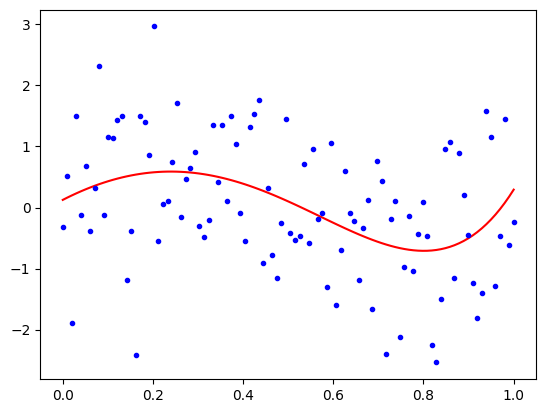

In [23]:
descGradPoly(X,y,10000,0.01,5)
plt.plot(X,y,'b.')

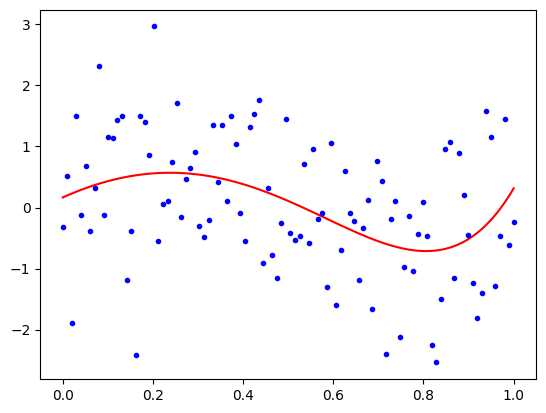

In [24]:
descGradPoly(X,y,10000,0.01,6)
plt.plot(X,y,'b.')

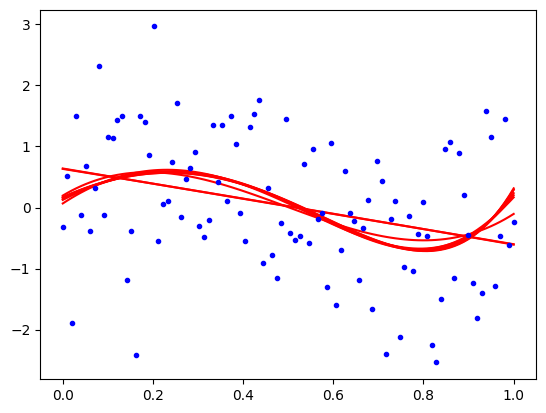

In [25]:
m_list=list()
error_list=list()
for i in range(1,10):
    m_list.append(i)
    error_list.append(descGradPoly(X,y,10000,0.01,i))
plt.plot(X,y,'b.')

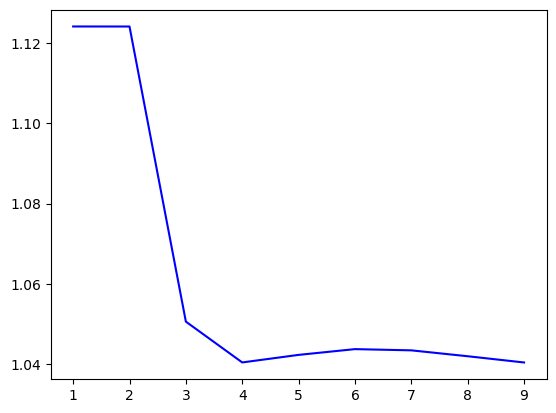

In [26]:
plt.plot(m_list,error_list,'b-')

In [27]:
error_list

[1.1241701035713552,
 1.1241609385831324,
 1.0505537344600104,
 1.0403721669190804,
 1.042256858127851,
 1.043693816365174,
 1.0433876064688412,
 1.041917375131804,
 1.0403622142107596]